In [1]:
import numpy as np
from athena_read import athdf
import matplotlib.pyplot as plt
import Constants 
c=Constants.Constants()

%matplotlib inline
base_dir = '../../../data/TDSC/M20_B0.1_R1_D0.02_PR/'

Constants defined...


In [2]:
myfile=base_dir + "COLL.out1."+"00000"+".athdf"
d = athdf(myfile)
X,Y = np.meshgrid(d['x1f'], d['x2f'], indexing='ij')

Text(0, 0.5, 'y')

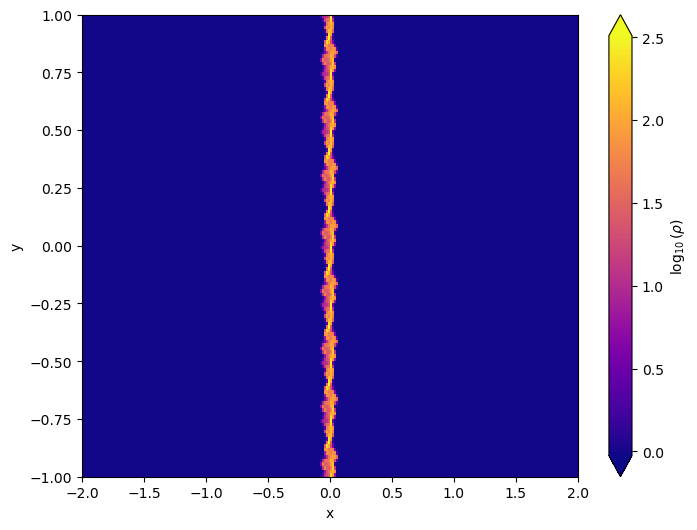

In [28]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
contour = ax.pcolormesh(X, Y, (np.log10(d['rho'])[32,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(0, 0.5, 'y')

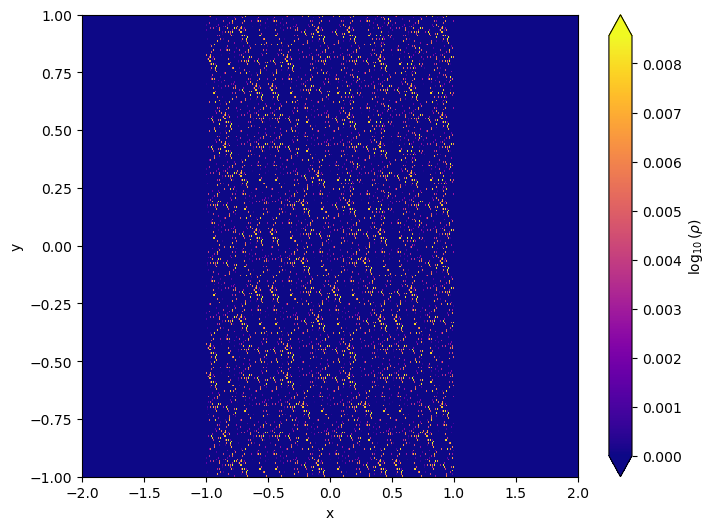

In [35]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
contour = ax.pcolormesh(X, Y, (np.log10(d['rho'])[100,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_xlim(-1,1)
# ax.set_ylim(-2,2)

Text(0, 0.5, 'y')

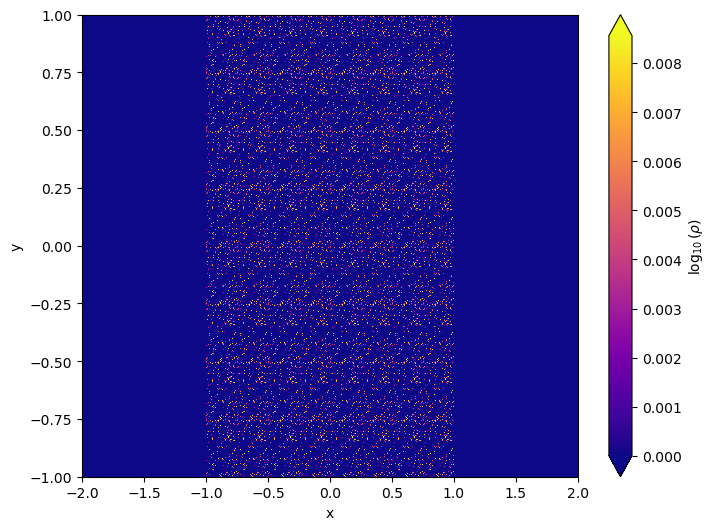

In [31]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
contour = ax.pcolormesh(X, Y, (np.log10(d['rho'])[300,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(0, 0.5, 'y')

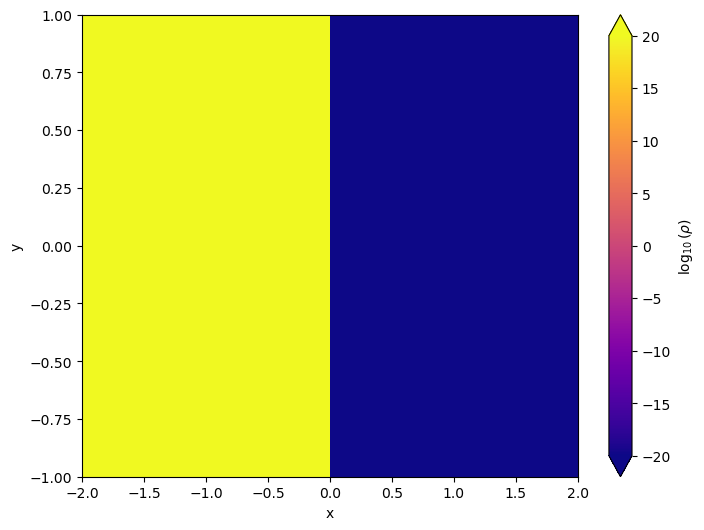

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
contour = ax.pcolormesh(X, Y, ((d['vel1'])[48,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax.set_xlabel("x")
ax.set_ylabel("y")

In [ ]:
# Perform FFT on the 3D array
shape = np.shape((d['rho']))
fft_Ek = np.fft.fftshift(np.fft.fftn(((d['rho']-1))[:,:,:]))

# Generate wavevector coordinates ranging from -k to k
kz = np.fft.fftfreq(shape[0])
ky = np.fft.fftfreq(shape[1])
kx = np.fft.fftfreq(shape[2])

# Shift zero frequency component to the center
kz = np.fft.fftshift(kz)*(shape[0]/1)
ky = np.fft.fftshift(ky)*(shape[1]/1)
kx = np.fft.fftshift(kx)*(shape[2]/2)

# Create a 3D meshgrid for the wavevectors
Kz, Ky, Kx = np.meshgrid(kz, ky, kx, indexing='ij')

In [29]:
k = np.sqrt(Kx**2 + Ky**2 + Kz**2)
power_spectrum = np.abs(fft_Ek)

# Bin the k-values to compute the spectrum
k_bins = np.linspace(np.min(k), (np.max(k)), num=100)  # Adjust bin size as needed
energy_spectrum = np.zeros(len(k_bins) - 1)

# Compute the energy in each bin
for i in range(len(k_bins) - 1):
    bin_mask = (k >= k_bins[i]) & (k < k_bins[i + 1])
    energy_spectrum[i] = np.mean(power_spectrum[bin_mask])

# Compute the center of each bin for plotting
bin_centers = 0.5 * (k_bins[:-1] + k_bins[1:])

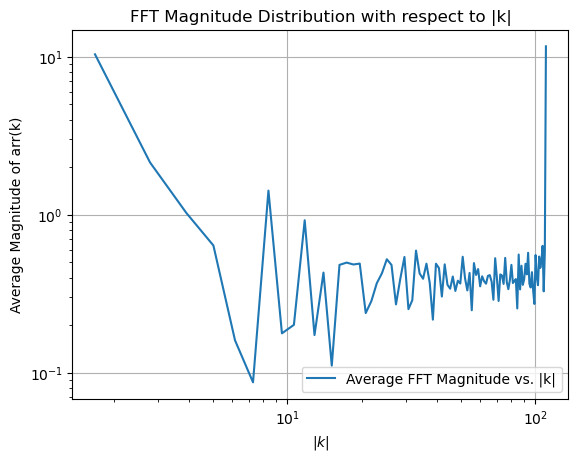

In [22]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label='Average FFT Magnitude vs. |k|')
# plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**10.2)
# plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**9.0)
plt.xlabel(r'$|k|$')
plt.ylabel('Average Magnitude of arr(k)')
plt.title('FFT Magnitude Distribution with respect to |k|')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

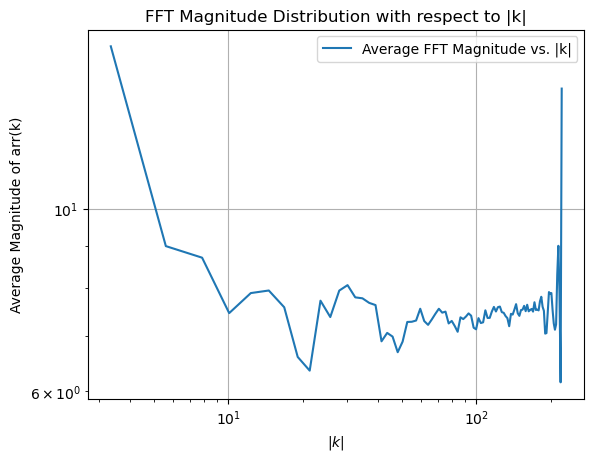

In [17]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label='Average FFT Magnitude vs. |k|')
# plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**10.2)
# plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**9.0)
plt.xlabel(r'$|k|$')
plt.ylabel('Average Magnitude of arr(k)')
plt.title('FFT Magnitude Distribution with respect to |k|')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

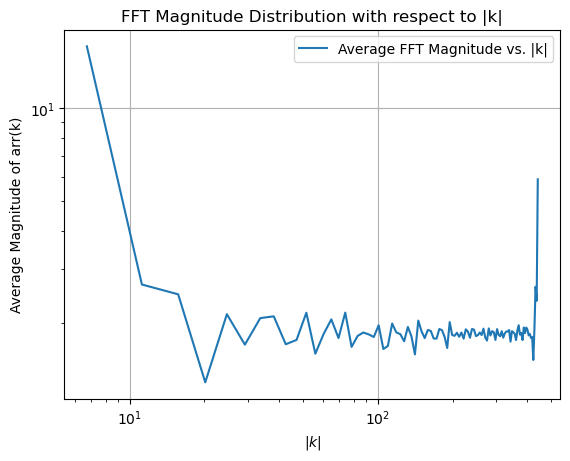

In [30]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label='Average FFT Magnitude vs. |k|')
# plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**10.2)
# plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**9.0)
plt.xlabel(r'$|k|$')
plt.ylabel('Average Magnitude of arr(k)')
plt.title('FFT Magnitude Distribution with respect to |k|')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()